In [7]:
import sys
import os
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../Dataset'))
sys.path.append(os.path.abspath('..'))

import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import func_preprocesamiento
importlib.reload(func_preprocesamiento)
from func_preprocesamiento import preprocesar, preprocesar_binarios, procesar_antiguedad, preprocesar_categoricos

In [8]:
dev_df = pd.read_csv('../Dataset/raw/dev.csv')
bins = pd.qcut(dev_df['precio_pesos_constantes'], q=5, labels=False)  # 4 cuartiles
train_dataset, val_dataset = train_test_split(dev_df, train_size=0.2, random_state=42, stratify=bins)

X_train = train_dataset.drop(columns=['precio_pesos_constantes'])
y_train = train_dataset['precio_pesos_constantes']


/tmp/ipykernel_11846/619359599.py:1: DtypeWarning: Columns (8,33) have mixed types. Specify dtype option on import or set low_memory=False.
/tmp/ipykernel_18900/1413943944.py:1: DtypeWarning: Columns (8,33) have mixed types. Specify dtype option on import or set low_memory=False.
/tmp/ipykernel_11846/619359599.py:1: DtypeWarning: Columns (8,33) have mixed types. Specify dtype option on import or set low_memory=False.
/tmp/ipykernel_16322/1641456509.py:1: DtypeWarning: Columns (8,33) have mixed types. Specify dtype option on import or set low_memory=False.
  dev_df = pd.read_csv('../Dataset/raw/dev.csv')


In [9]:
df = preprocesar(train_dataset)
direccion = '../Dataset/Procesado/dev_procesado.csv'
direccion = '../Dataset/Procesado/train_procesado.csv'
df.to_csv(direccion, index=False)

Columna a predecir: ITE_ADD_NEIGHBORHOOD_NAME_encoded
Columna a predecir: SalonDeUsosMul
Columna a predecir: AireAC
Columna a predecir: Estacionamiento
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/ciror/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_11846/953918305.py", line 1, in <module>
    df = preprocesar(train_dataset)
  File "/home/ciror/Desktop/proyecto_final/proyecto_final_Guerrero_Russi/src/func_preprocesamiento.py", line 28, in preprocesar
    df = preprocesar_binarios(df, bin_cols_prim, 'RF', ind_cols)
  File "/home/ciror/Desktop/proyecto_final/proyecto_final_Guerrero_Russi/src/func_preprocesamiento.py", line 130, in preprocesar_binarios
    df = valor_faltante_random_forest(df, columna, 'CLAS', False, ind_cols)
  File "/home/ciror/Desktop/proyecto_final/proyecto_final_Guerrero_Russi/src/func_preprocesamiento.py", line 170, in valor_faltante_random_forest
    y_faltantes_pred = modelo.predict(X_faltantes)
  File "/home/ciror/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 82

In [ ]:
columna = ['ITE_ADD_CITY_NAME', 'ITE_ADD_STATE_NAME', 'ITE_ADD_NEIGHBORHOOD_NAME', 'ITE_TIPO_PROD', 'TIPOPROPIEDAD'] #SACARLAS PORQUE SON CATEGORICAS
# direccion = '../Dataset/Procesado/train_procesado_numerico.csv'
# df = df.drop(columns=columna)
# df.to_csv(direccion, index=False)
# train_procesado = pd.read_csv(direccion)

direccion = '../Dataset/Procesado/val_procesado_numerico.csv'
df_val = df_val.drop(columns=columna)
df_val.to_csv(direccion, index=False)
val_procesado = pd.read_csv(direccion)

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un scatter plot de precio_pesos_constantes y STotalM2 en escala logarítmica
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=train_procesado['STotalM2'], y=train_procesado['precio_pesos_constantes'])
scatter_plot.set(xscale="log", yscale="log")
plt.title('Scatter plot de STotalM2 vs precio_pesos_constantes (Escala Logarítmica)')
plt.xlabel('STotalM2 (log)')
plt.ylabel('precio_pesos_constantes (log)')
plt.show()

NameError: name 'train_procesado' is not defined

<Figure size 1000x600 with 0 Axes>

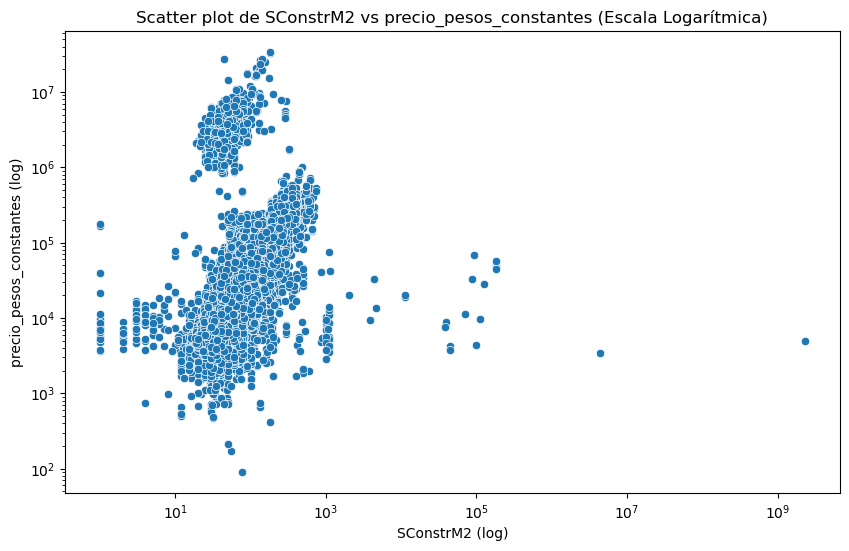

In [ ]:
# Crear un scatter plot de precio_pesos_constantes y STotalM2 en escala logarítmica
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=train_procesado['SConstrM2'], y=train_procesado['precio_pesos_constantes'])
scatter_plot.set(xscale="log", yscale="log")
plt.title('Scatter plot de SConstrM2 vs precio_pesos_constantes (Escala Logarítmica)')
plt.xlabel('SConstrM2 (log)')
plt.ylabel('precio_pesos_constantes (log)')
plt.show()

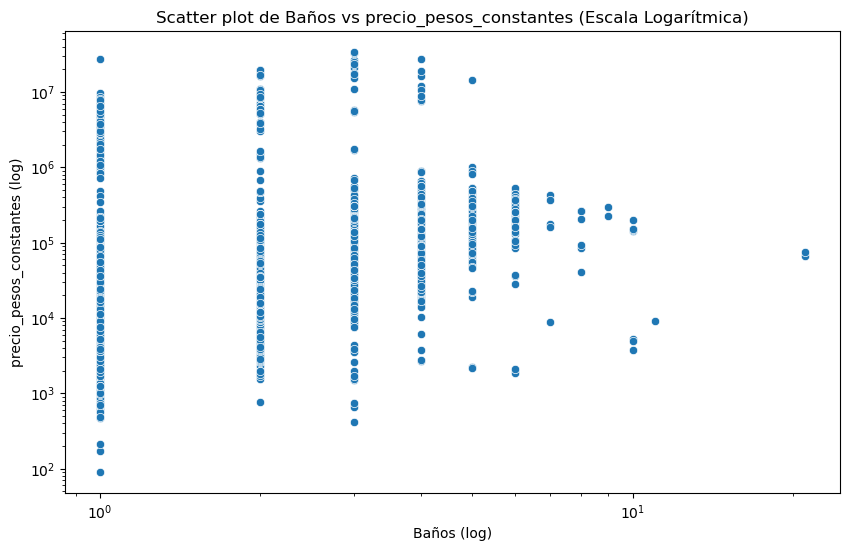

In [ ]:
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=train_procesado['Banos'], y=train_procesado['precio_pesos_constantes'])
scatter_plot.set(xscale="log", yscale="log")
plt.title('Scatter plot de Baños vs precio_pesos_constantes (Escala Logarítmica)')
plt.xlabel('Baños (log)')
plt.ylabel('precio_pesos_constantes (log)')
plt.show()

/tmp/ipykernel_16322/1021832593.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  scatter_plot = sns.stripplot(x='ITE_ADD_NEIGHBORHOOD_NAME',


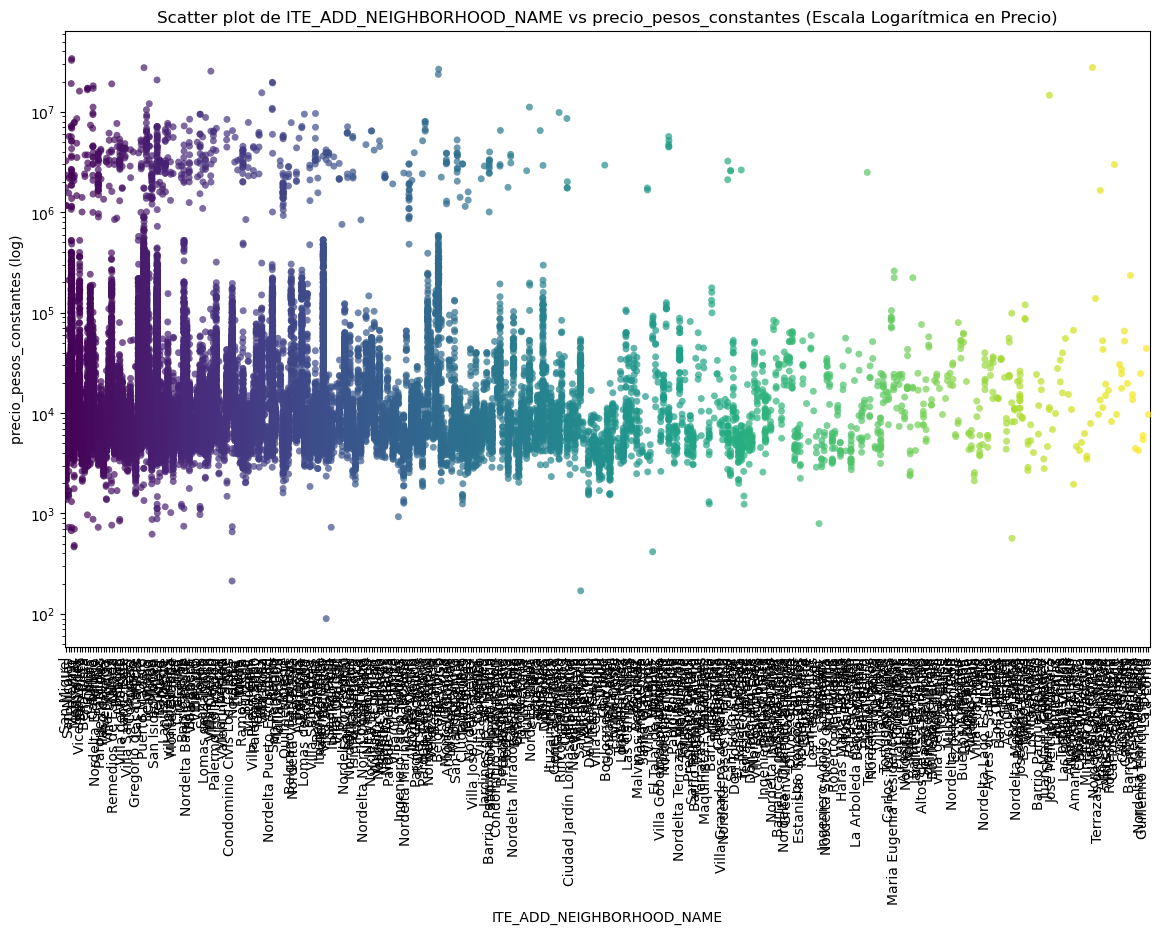

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el DataFrame
train_procesado_categorico = pd.read_csv('../Dataset/Procesado/train_procesado.csv')

# Crear un scatter plot de ITE_ADD_NEIGHBORHOOD_NAME y precio_pesos_constantes
plt.figure(figsize=(14, 8))
scatter_plot = sns.stripplot(x='ITE_ADD_NEIGHBORHOOD_NAME', 
                             y='precio_pesos_constantes', 
                             data=train_procesado_categorico, 
                             jitter=True, 
                             palette='viridis', 
                             alpha=0.7)

# Aplicar escala logarítmica solo al eje y (precio)
scatter_plot.set(yscale="log")
plt.title('Scatter plot de ITE_ADD_NEIGHBORHOOD_NAME vs precio_pesos_constantes (Escala Logarítmica en Precio)')
plt.xlabel('ITE_ADD_NEIGHBORHOOD_NAME')
plt.ylabel('precio_pesos_constantes (log)')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()